In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Startups play a crucial role in driving innovation and economic growth, but not all startups succeed. Investment decisions are highly influenced by industry trends, funding rounds, investor confidence, and market conditions. However, the relationship between funding, valuation, and growth rate remains complex and varies across industries and countries.

This analysis aims to identify key factors affecting startup success by examining:

The impact of funding rounds and investment amounts on startup valuation.
How industry and country influence total investments and average growth rates.
Whether a higher number of investors leads to faster growth.
Identifying the fastest-growing industries and most valuable startups.

 **Objective**:
To provide data-driven insights for investors, entrepreneurs, and policymakers to better understand startup funding trends, optimize investment decisions, and identify high-potential industries for future growth. 


In [2]:
df = pd.read_csv('startup_growth_investment_data.csv')

In [3]:
df

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00
...,...,...,...,...,...,...,...,...,...
4995,Startup_4996,EdTech,5,4.015771e+09,1.212346e+10,29,Germany,2002,64.08
4996,Startup_4997,AI,2,3.619535e+09,1.107936e+10,14,Brazil,2000,151.29
4997,Startup_4998,SaaS,10,4.257640e+08,8.277586e+08,29,UK,2018,140.43
4998,Startup_4999,SaaS,4,4.220592e+08,1.895497e+09,6,India,2017,122.93


In [4]:
df.head()

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1.335166e+09,6.621448e+09,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2.781498e+09,8.363214e+09,36,UK,2006,105.52
2,Startup_3,EdTech,10,3.309032e+09,1.548270e+10,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4.050196e+09,1.268253e+10,44,France,2021,9.44
4,Startup_5,EdTech,9,1.645080e+09,6.887966e+09,48,India,2011,192.00


In [5]:
df.tail()

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
4995,Startup_4996,EdTech,5,4.015771e+09,1.212346e+10,29,Germany,2002,64.08
4996,Startup_4997,AI,2,3.619535e+09,1.107936e+10,14,Brazil,2000,151.29
4997,Startup_4998,SaaS,10,4.257640e+08,8.277586e+08,29,UK,2018,140.43
4998,Startup_4999,SaaS,4,4.220592e+08,1.895497e+09,6,India,2017,122.93
4999,Startup_5000,Biotech,5,1.208767e+09,2.265635e+09,8,USA,2010,71.09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Startup Name             5000 non-null   object 
 1   Industry                 5000 non-null   object 
 2   Funding Rounds           5000 non-null   int64  
 3   Investment Amount (USD)  5000 non-null   float64
 4   Valuation (USD)          5000 non-null   float64
 5   Number of Investors      5000 non-null   int64  
 6   Country                  5000 non-null   object 
 7   Year Founded             5000 non-null   int64  
 8   Growth Rate (%)          5000 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 351.7+ KB


In [7]:
df['Investment Amount (USD)']=df['Investment Amount (USD)'].astype(int)
df['Valuation (USD)']=df['Valuation (USD)'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Startup Name             5000 non-null   object 
 1   Industry                 5000 non-null   object 
 2   Funding Rounds           5000 non-null   int64  
 3   Investment Amount (USD)  5000 non-null   int64  
 4   Valuation (USD)          5000 non-null   int64  
 5   Number of Investors      5000 non-null   int64  
 6   Country                  5000 non-null   object 
 7   Year Founded             5000 non-null   int64  
 8   Growth Rate (%)          5000 non-null   float64
dtypes: float64(1), int64(5), object(3)
memory usage: 351.7+ KB


In [9]:
df.head(5)

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%)
0,Startup_1,Blockchain,8,1335165853,6621448041,50,Germany,2012,77.10
1,Startup_2,SaaS,2,2781498219,8363214103,36,UK,2006,105.52
2,Startup_3,EdTech,10,3309031930,15482697353,39,Singapore,2016,190.47
3,Startup_4,Fintech,5,4050196269,12682527892,44,France,2021,9.44
4,Startup_5,EdTech,9,1645080294,6887965942,48,India,2011,192.00


In [10]:
df.isnull().sum()

Startup Name               0
Industry                   0
Funding Rounds             0
Investment Amount (USD)    0
Valuation (USD)            0
Number of Investors        0
Country                    0
Year Founded               0
Growth Rate (%)            0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.describe()

,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Year Founded,Growth Rate (%)
count,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,5.491600,2.455567e+09,7.971059e+09,25.542000,2011.544000,102.091732
std,2.913353,1.423787e+09,5.479487e+09,14.271838,6.885285,56.179781
min,1.000000,1.102610e+06,1.722547e+06,1.000000,2000.000000,5.060000
25%,3.000000,1.221506e+09,3.598305e+09,13.000000,2006.000000,52.815000
50%,6.000000,2.460634e+09,7.002304e+09,25.000000,2012.000000,102.215000
75%,8.000000,3.639951e+09,1.147676e+10,38.000000,2018.000000,150.580000
max,10.000000,4.999544e+09,2.470906e+10,50.000000,2023.000000,199.970000


<Axes: xlabel='Funding Rounds'>

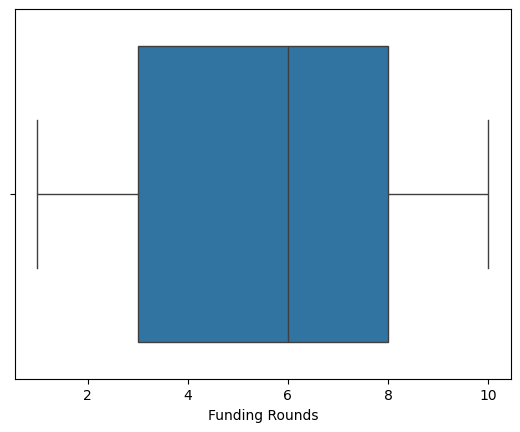

In [13]:
sns.boxplot(x='Funding Rounds',data=df)

<Axes: xlabel='Investment Amount (USD)'>

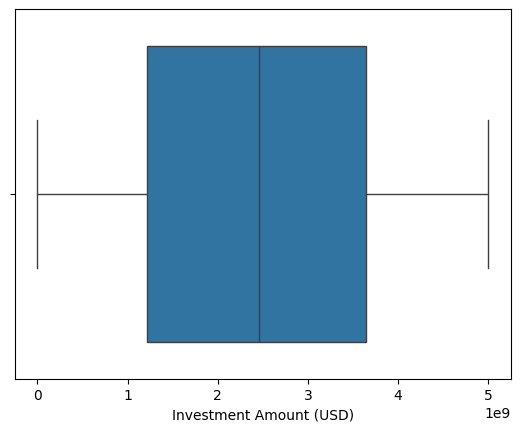

In [14]:
sns.boxplot(x='Investment Amount (USD)',data=df)

<Axes: xlabel='Valuation (USD)'>

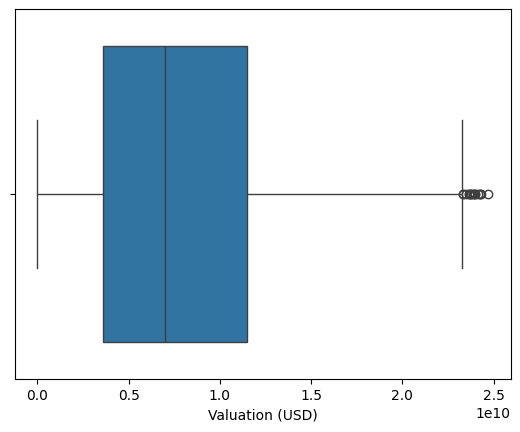

In [15]:
sns.boxplot(x='Valuation (USD)',data=df)

<Axes: xlabel='Number of Investors'>

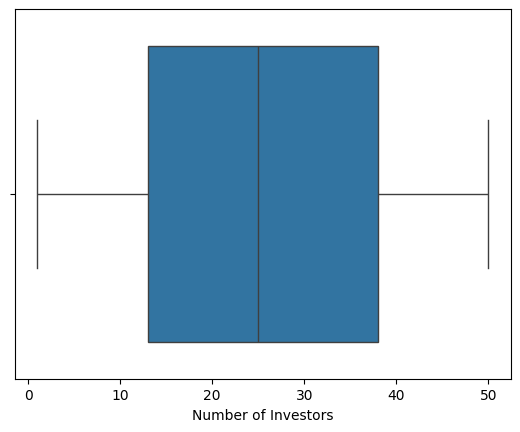

In [16]:
sns.boxplot(x='Number of Investors',data=df)

<Axes: xlabel='Year Founded'>

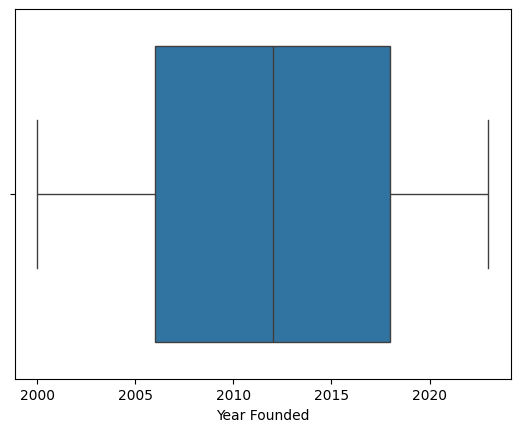

In [17]:
sns.boxplot(x='Year Founded',data=df)

<Axes: xlabel='Growth Rate (%)'>

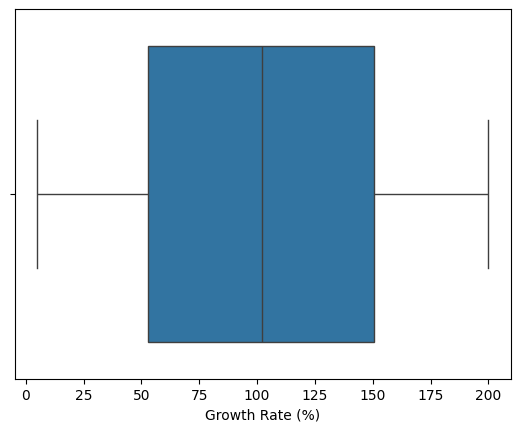

In [18]:
sns.boxplot(x='Growth Rate (%)',data=df)

In [19]:
df=df[df['Valuation (USD)']<df['Valuation (USD)'].quantile(0.99)]

<Axes: xlabel='Valuation (USD)'>

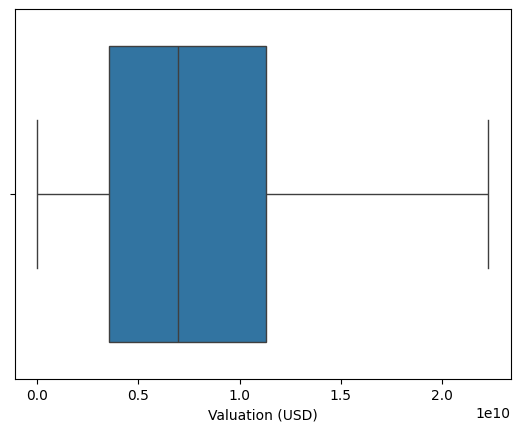

In [20]:
sns.boxplot(x='Valuation (USD)',data=df)

In [21]:
df.shape

(4950, 9)

we can see that before removing outliers the the number of row are 5000 and after removing it became 4950 .

**Exploratory Data Analysis**

1. Year Founded vs. Growth Rate

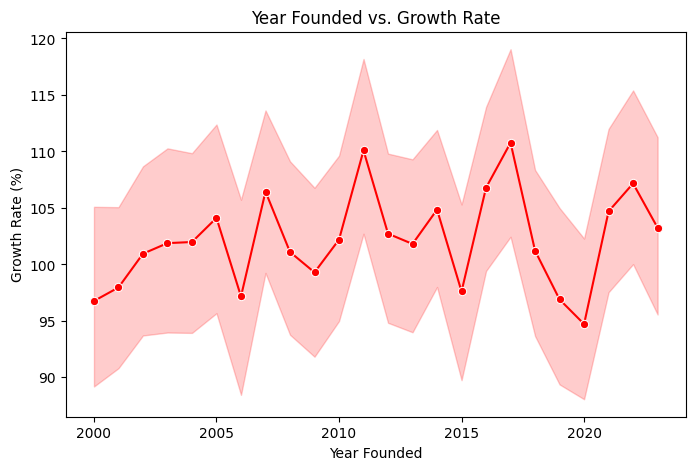

In [22]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['Year Founded'], y=df['Growth Rate (%)'], marker='o', color='red')
plt.title('Year Founded vs. Growth Rate')
plt.xlabel('Year Founded')
plt.ylabel('Growth Rate (%)')
plt.show()

The graph shows startup growth rate fluctuations over time, with peaks around 2010-2012 and 2015-2017, and valleys around 2002-2004 and 2018-2020, suggesting a correlation between founding year and growth.  This indicates that timing plays a significant role in startup success, likely influenced by economic conditions and market trends.

2. Industry vs. Total Investment Amount

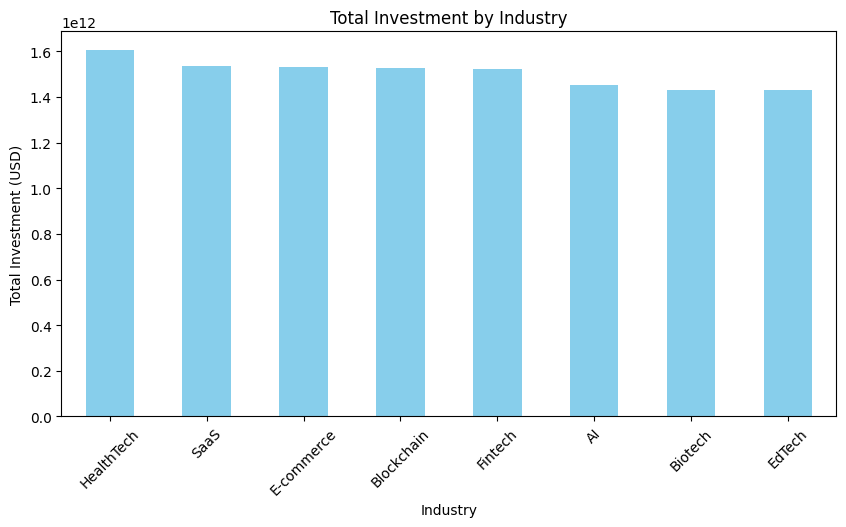

In [23]:
plt.figure(figsize=(10,5))
industry_investment = df.groupby('Industry')['Investment Amount (USD)'].sum().sort_values(ascending=False)
industry_investment.plot(kind='bar', color='skyblue')
plt.title('Total Investment by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Investment (USD)')
plt.xticks(rotation=45)
plt.show()

This chart ranks industries by total investment received, highlighting Health Tech as the most funded sector

3. Country-wise Total Investment Amount 

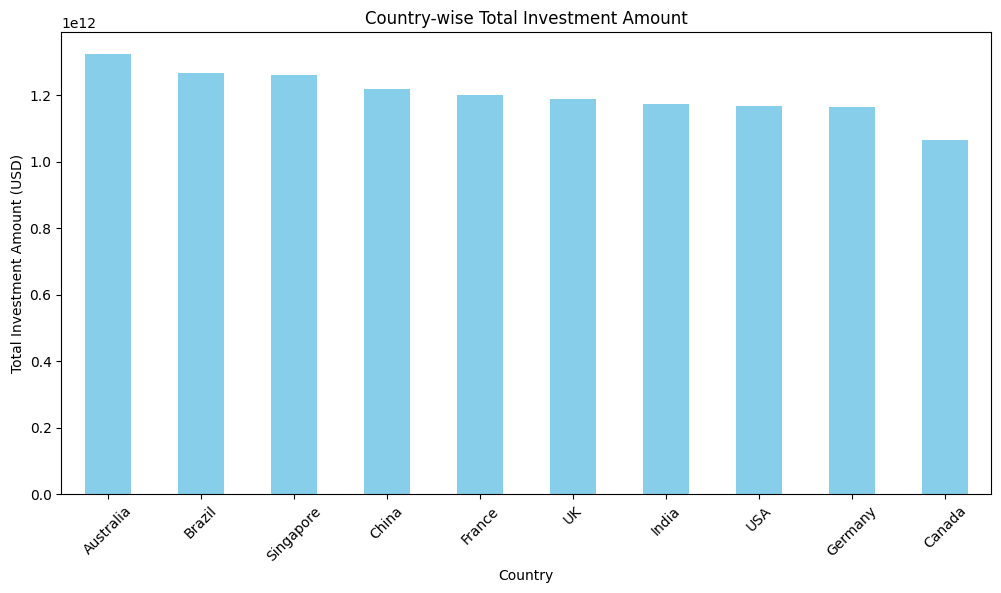

In [24]:
country_funding = df.groupby('Country')['Investment Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_funding.plot(kind='bar', color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Investment Amount (USD)')
plt.title('Country-wise Total Investment Amount')
plt.xticks(rotation=45)
plt.show()

The chart depicts total investment amounts across various countries, revealing Australia and Brazil as leading recipients.  It suggests a strong concentration of investment in specific regions, highlighting potential hubs for startup activity.

4. Funding Rounds vs. Investment Amount 

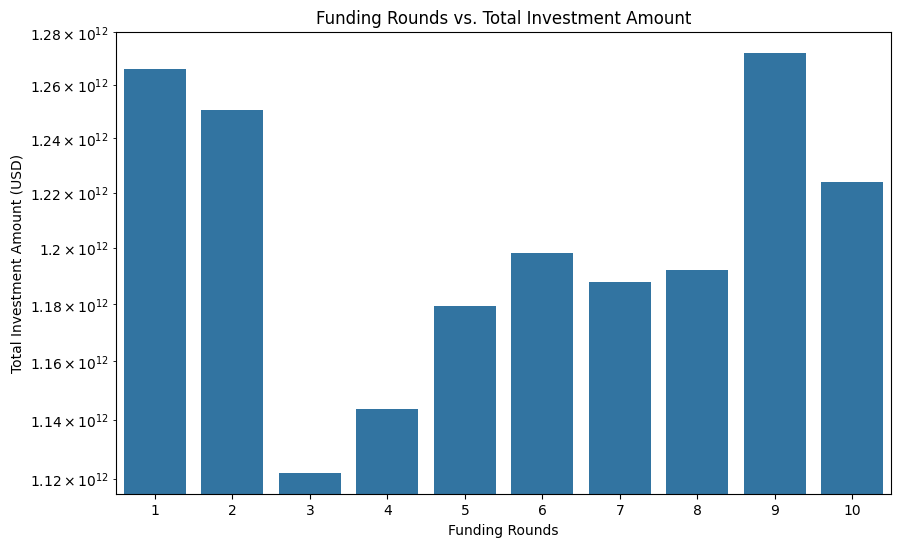

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Funding Rounds', y='Investment Amount (USD)', data=df, estimator=sum, ci=None)
plt.yscale('log')
plt.xlabel('Funding Rounds')
plt.ylabel('Total Investment Amount (USD)')
plt.title('Funding Rounds vs. Total Investment Amount')
plt.show()

The bar plot shows the total investment amount for each funding round, revealing a non-linear relationship with significant peaks in rounds 1 and 9. This suggests a pattern where certain funding rounds attract substantially more investment than others.

5. Funding Rounds vs. Valuation

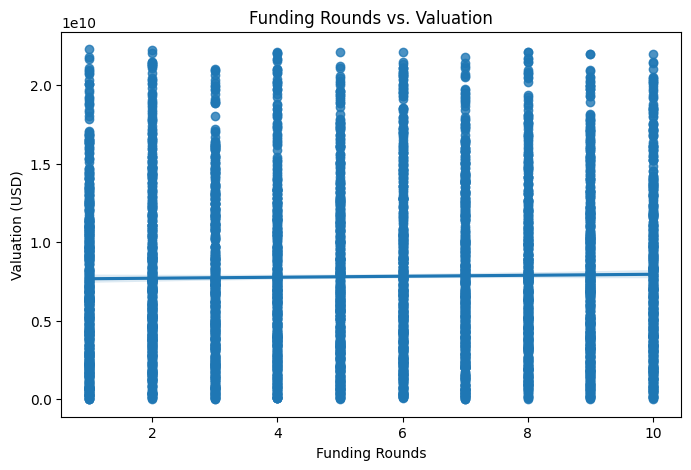

In [26]:
plt.figure(figsize=(8,5))
sns.regplot(x=df['Funding Rounds'], y=df['Valuation (USD)'])
plt.title('Funding Rounds vs. Valuation')
plt.xlabel('Funding Rounds')
plt.ylabel('Valuation (USD)')
plt.show()

The scatter plot displays startup valuations against funding rounds, showing a broad spread of valuations at each stage.  There's no clear linear correlation, indicating that funding round number alone doesn't dictate valuation.  Other factors beyond funding rounds significantly influence a startup's assessed worth.

6. Investment Amount vs. Valuation

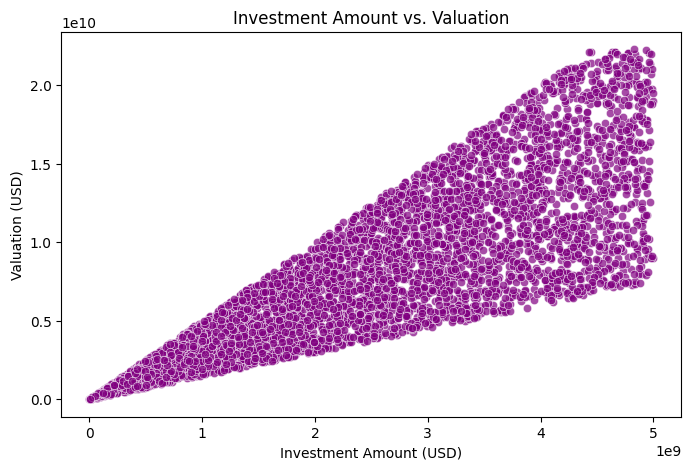

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Investment Amount (USD)'], y=df['Valuation (USD)'], alpha=0.7, color='purple')
plt.title('Investment Amount vs. Valuation')
plt.xlabel('Investment Amount (USD)')
plt.ylabel('Valuation (USD)')
plt.show()

The scatter plot shows a positive correlation between investment amount and valuation, indicating higher investments generally lead to higher valuations.  

7. Number of Investors vs. Growth Rate

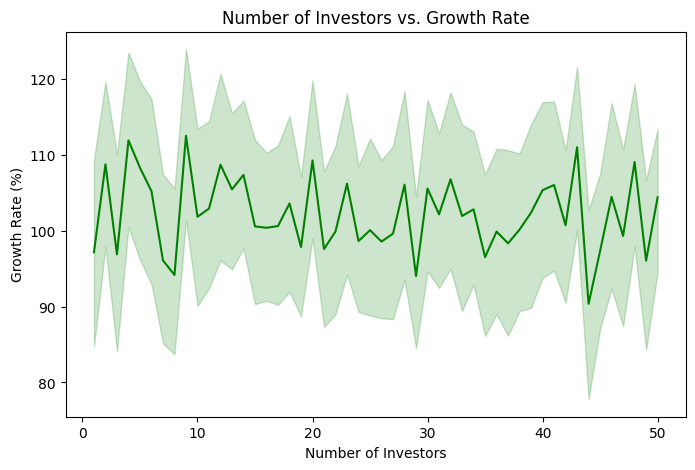

In [28]:
plt.figure(figsize=(8,5))
sns.lineplot(x=df['Number of Investors'], y=df['Growth Rate (%)'], color='green')
plt.title('Number of Investors vs. Growth Rate')
plt.xlabel('Number of Investors')
plt.ylabel('Growth Rate (%)')
plt.show()

The graph shows how a startup's growth changes as the number of investors changes.  It jumps up and down, meaning more investors don't always mean faster growth.  But, sometimes, when there are more investors, the startup does grow faster

8. Industry-wise Number of Investors 

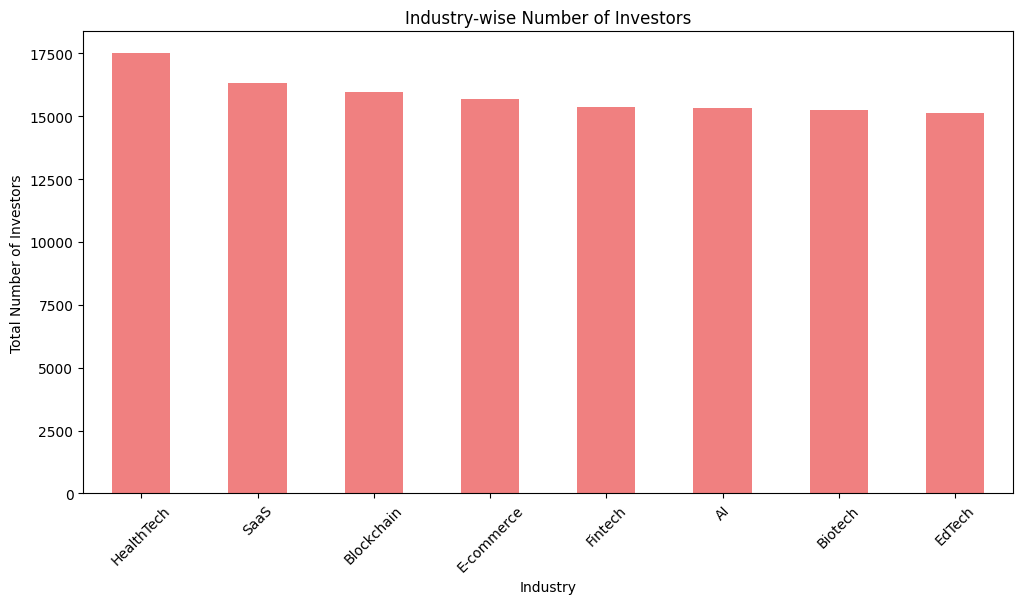

In [29]:
industry_investors = df.groupby('Industry')['Number of Investors'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
industry_investors.plot(kind='bar', color='lightcoral')
plt.xlabel('Industry')
plt.ylabel('Total Number of Investors')
plt.title('Industry-wise Number of Investors')
plt.xticks(rotation=45)
plt.show()

The bar chart displays the total number of investors across different industries, clearly showing Health Tech attracts the most investors.  It highlights a significant investor preference for Health Tech, suggesting strong confidence in the sector's potential compared to others.

9. Country-wise Average Growth Rate

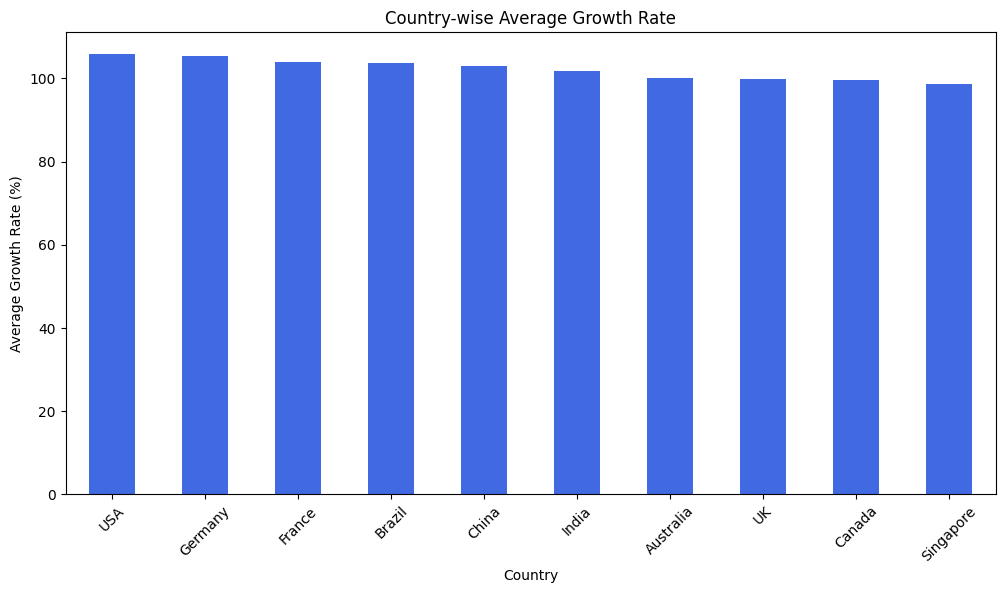

In [30]:
# Group by 'Country' and calculate the average growth rate
country_growth = df.groupby('Country')['Growth Rate (%)'].mean().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
country_growth.plot(kind='bar', color='royalblue')

# Labels and title
plt.xlabel('Country')
plt.ylabel('Average Growth Rate (%)')
plt.title('Country-wise Average Growth Rate')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

The bar chart compares average startup growth rates across different countries, revealing relatively similar growth percentages with slight variations.  It indicates that while there are minor differences, overall startup growth rates are fairly consistent across the listed countries.

10. Industry-wise Average Growth Rate

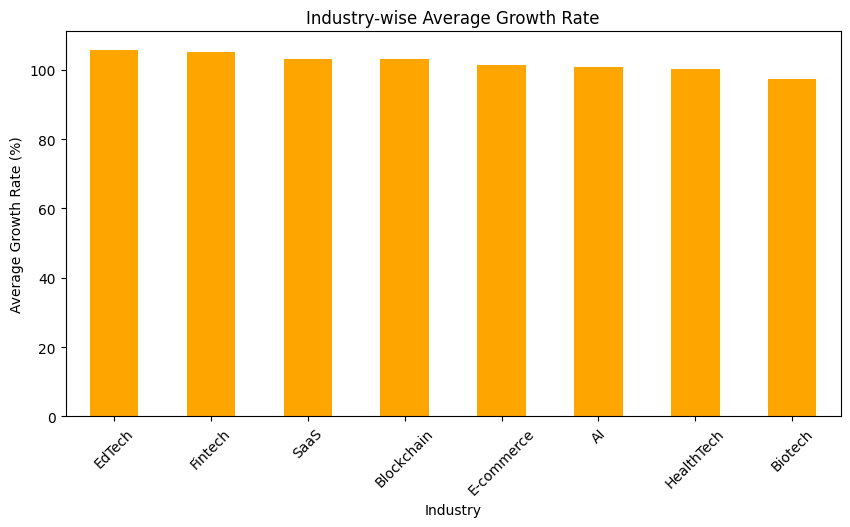

In [31]:
plt.figure(figsize=(10,5))
industry_growth = df.groupby('Industry')['Growth Rate (%)'].mean().sort_values(ascending=False)
industry_growth.plot(kind='bar', color='orange')
plt.title('Industry-wise Average Growth Rate')
plt.xlabel('Industry')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(rotation=45)
plt.show()

The bar chart shows average startup growth rates across different industries, with EdTech displaying the highest average growth.  It reveals a slight variation in growth rates among industries, suggesting that EdTech startups, on average, experience the fastest growth in this dataset.

11. Investment Amount vs. Growth Rate 

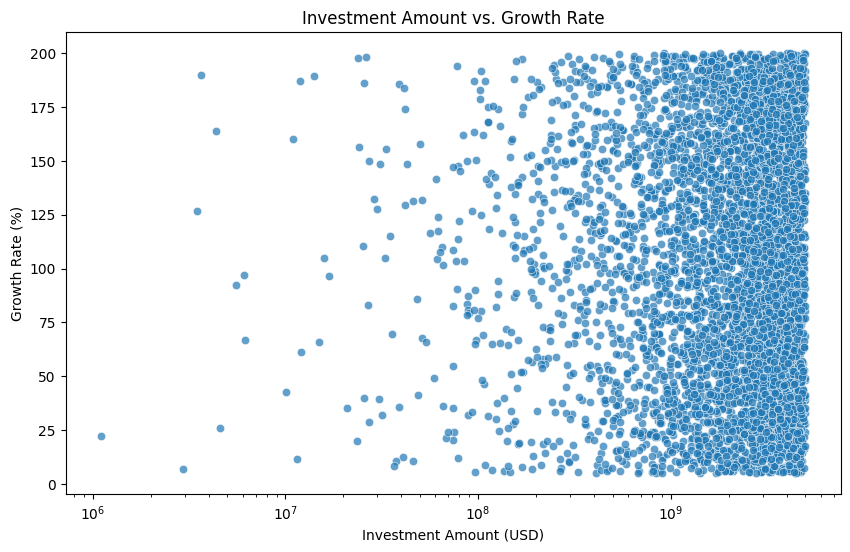

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Investment Amount (USD)', y='Growth Rate (%)', data=df, alpha=0.7)
plt.xscale('log')  # Log scale for better visualization
plt.xlabel('Investment Amount (USD)')
plt.ylabel('Growth Rate (%)')
plt.title('Investment Amount vs. Growth Rate')
plt.show()


The graph shows how much money startups get (investment) and how fast they grow.  It's messy, meaning lots of different growth speeds happen with different amounts of money.  Basically, more money doesn't always mean faster growth.

12. Top 10 Startups by Valuation

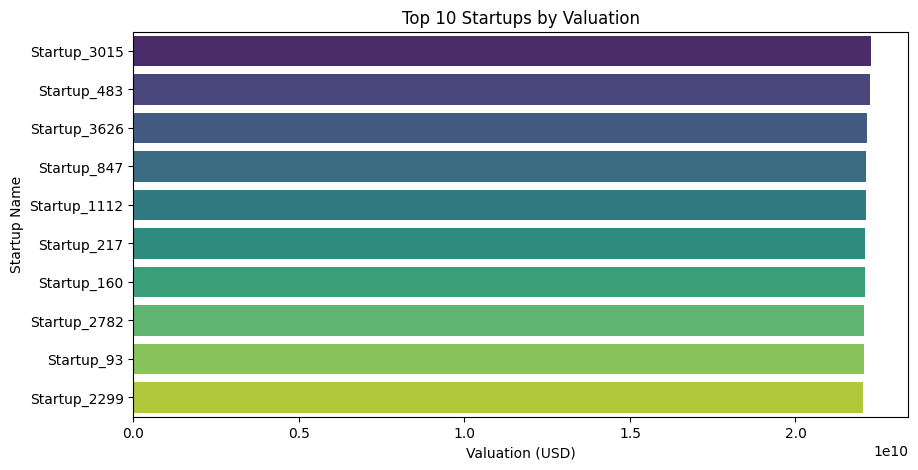

In [33]:
top_startups = df.nlargest(10, 'Valuation (USD)')  # Select top 10 startups by valuation
plt.figure(figsize=(10,5))
sns.barplot(x=top_startups['Valuation (USD)'], y=top_startups['Startup Name'], palette='viridis')
plt.title('Top 10 Startups by Valuation')
plt.xlabel('Valuation (USD)')
plt.ylabel('Startup Name')
plt.show()

The chart ranks the top 10 startups by valuation, clearly showing "Startup 3015" as the most valuable.  It highlights the significant disparity in valuations among the leading startups, indicating a wide range of success.

**conclusion**

Industry & Timing are key drivers of startup success, with Health Tech and EdTech standing out.

Funding doesn’t always translate to valuation or growth—execution, market trends, and investor confidence matter.

Investment is concentrated in certain regions (Australia, Brazil), showing startup-friendly ecosystems.

Not all startups follow the same funding trajectory, as valuation and growth rates vary significantly.

 **Recommendation**:
Startups should focus not only on securing funding but also on strategic timing, industry trends, execution excellence, and market positioning to maximize growth and valuation.

**feature selection**

In [34]:
from sklearn.preprocessing import OneHotEncoder

In [35]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['Industry','Country']])
df2 = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(['Industry','Country']))
result = pd.concat([df,df2],axis=1)
result

,Startup Name,Industry,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Country,Year Founded,Growth Rate (%),Industry_AI,...,Country_Australia,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Singapore,Country_UK,Country_USA
0,Startup_1,Blockchain,8.0,1.335166e+09,6.621448e+09,50.0,Germany,2012.0,77.10,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Startup_2,SaaS,2.0,2.781498e+09,8.363214e+09,36.0,UK,2006.0,105.52,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Startup_3,EdTech,10.0,3.309032e+09,1.548270e+10,39.0,Singapore,2016.0,190.47,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Startup_4,Fintech,5.0,4.050196e+09,1.268253e+10,44.0,France,2021.0,9.44,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Startup_5,EdTech,9.0,1.645080e+09,6.887966e+09,48.0,India,2011.0,192.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
result.columns

Index(['Startup Name', 'Industry', 'Funding Rounds', 'Investment Amount (USD)',
       'Valuation (USD)', 'Number of Investors', 'Country', 'Year Founded',
       'Growth Rate (%)', 'Industry_AI', 'Industry_Biotech',
       'Industry_Blockchain', 'Industry_E-commerce', 'Industry_EdTech',
       'Industry_Fintech', 'Industry_HealthTech', 'Industry_SaaS',
       'Country_Australia', 'Country_Brazil', 'Country_Canada',
       'Country_China', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Singapore', 'Country_UK', 'Country_USA'],
      dtype='object')

In [37]:
result = pd.get_dummies(df,dtype=int,drop_first=True)
result


,Funding Rounds,Investment Amount (USD),Valuation (USD),Number of Investors,Year Founded,Growth Rate (%),Startup Name_Startup_10,Startup Name_Startup_100,Startup Name_Startup_1000,Startup Name_Startup_1001,...,Industry_SaaS,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Germany,Country_India,Country_Singapore,Country_UK,Country_USA
0,8,1335165853,6621448041,50,2012,77.10,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,2781498219,8363214103,36,2006,105.52,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,10,3309031930,15482697353,39,2016,190.47,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,5,4050196269,12682527892,44,2021,9.44,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9,1645080294,6887965942,48,2011,192.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5,4015770563,12123456834,29,2002,64.08,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4996,2,3619534900,11079363238,14,2000,151.29,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4997,10,425763990,827758556,29,2018,140.43,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4998,4,422059213,1895497472,6,2017,122.93,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


**Split the data into train and test**

In [38]:
X =result.drop('Investment Amount (USD)',axis=1)  # Independent variables
Y = result['Investment Amount (USD)']  # Target variable

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 

In [40]:
x_train, x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [41]:
print('Shape of X_train is -' , x_train.shape)
print('Shape of X_train is -' , x_train.shape)
print('Shape of y_train is -' , y_train.shape)
print ('Shape of y_train is -' , y_train.shape)

Shape of X_train is - (3960, 4970)
Shape of X_train is - (3960, 4970)
Shape of y_train is - (3960,)
Shape of y_train is - (3960,)


In [42]:
reg = LinearRegression()

In [43]:
reg.fit(x_train, y_train)

LinearRegression()

In [44]:
reg.predict(x_test)

array([8.75481072e+08, 1.02682989e+09, 7.93024150e+08, 2.31093064e+09,
       2.72873555e+09, 8.12316353e+08, 3.31825722e+09, 2.89052958e+09,
       3.12875094e+09, 2.26576284e+09, 1.24064051e+09, 3.11583985e+09,
       1.20771516e+09, 1.27154186e+09, 2.81739543e+09, 3.59584288e+09,
       2.45030157e+09, 8.71253736e+08, 5.69430027e+09, 4.13047128e+09,
       9.91685369e+08, 2.33101665e+09, 9.64121881e+08, 1.54763915e+09,
       1.28329533e+09, 1.70872283e+09, 2.97723697e+09, 3.00692823e+09,
       2.66735657e+09, 3.01600094e+09, 4.05502589e+09, 1.65850528e+09,
       8.10320770e+08, 3.52927265e+09, 2.94491502e+09, 4.51629637e+09,
       3.60631518e+09, 2.08918440e+09, 4.09433583e+09, 1.32813258e+09,
       8.76210971e+08, 2.61135648e+09, 3.62340956e+09, 1.98786431e+09,
       2.10720759e+09, 1.62805780e+09, 1.30574029e+09, 7.33644494e+08,
       3.58316072e+09, 2.84745644e+09, 8.43917623e+08, 1.53107858e+09,
       2.28246523e+09, 3.63126731e+09, 2.05970787e+09, 2.26448131e+09,
      

In [45]:
r2_score(y_test,reg.predict(x_test))

0.7148540894644443